In [80]:
from brian2 import *

In [81]:
#El = None
#gl = None
main_eq = '''
dv/dt = (1/Cm)*(-gl * (El - v) - INa - IKd - Im - It - Il) : volt
'''

#gNa = 50*msiemens/cm**2
#ENa = 50*mV
eq_Na = '''
INa = gNa * m**3 * h * (v - ENa) : amp
dm/dt = alpham * (1-m) - betam * m : 1
dh/dt = alphah * (1-h) - betah * h : 1
alpham = (-0.32 / mV) * (v - vt - 13*mV) / (exp(-(v - vt - 13*mV)/(4*mV)) - 1) / ms : Hz
betam = (0.28 / mV) * (v - vt - 40*mV) / (exp((v - vt - 40*mV)/(5*mV)) - 1) / ms : Hz
alphah = (0.128 / mV) * exp(-(v - vt - 17*mV)/(18*mV)) : Hz
betah = 4 / (1 + exp(-(v - vt - 40*mV)/(5*mV))) : Hz
'''

#gKd = 5*msiemens/cm**2
#EK = - 90*mV
eq_Kd = '''
IKd = gKd * n**4 * (v - EK) : amp
dn/dt = alphan * (1-n) - betan * n : 1
alphan = (-0.32 / mV) * (v - vt - 15*mV)/(exp(-(v - vt - 15*mV)/(5*mV)) - 1) / ms : Hz
betan = 0.5 * exp(-(v - vt - 10)/(40*mV)) : Hz
'''

#gM = 0.004*msiemens/cm**2
#taumax = 4*second
eq_m = '''
Im = gM * p * (v - EK) : amp
dp/dt = (pinf - p)/(taup) : 1
pinf = 1/(1 + exp(-(v + 35*mV)/10*mV)) : 1
taup = taumax / (3.3 * exp((v + 35*mV)/(20*mV)) + exp(-(v + 35*mV)/(20*mV))) : second
'''

#gL = None
#ECa = 120*mV
eq_l = '''
Il = gL * q**2 * r * (v - ECa) : amp
dq/dt = alphaq * (1-q) - betaq * q : 1
dr/dt = alphar * (1-r) - betar * r : 1
alphaq = (0.055 / mV) * (-27*mV - v) / (exp((-27*mV - v)/(3.8*mV)) - 1) / ms : Hz
betaq = 0.94 * exp((-75*mV - v)/(17*mV)) / ms : Hz
alphar = 0.000457 * exp((-13*mV - v)/(50*mV)) / ms : Hz
betar = 0.0065 / (exp((-15*mV - v)/(28*mV)) + 1) / ms : Hz
'''

#vx = 2*mV
eq_t = '''
It = gT * s**2 * u * (v - ECa) : amp
du/dt = (uinf - u) / tauu : 1
s = 1 / (1 + exp(-(v + vx + 57*mV)/(6.2*mV))) : 1
u = 1 / (1 + exp((v + vx + 81*mV)/(4*mV))) : 1
tauu = (242.2 + exp((v + vx + 113.2*mV)/(5*mV))) / (3.7 * (1 + exp((v + vx + 84*mV)/(3.2*mV)))) * second : second
'''


In [104]:
## Regular Spiking Neurons (1)
start_scope()
gl = 0.0004*msiemens/cm**2
El = -70*mV
gNa = 0.05*msiemens/cm**2
gKd = 0.005*msiemens/cm**2
gM = 0.00007*msiemens/cm**2
vt = -65*mV
Cm = 0.29*nF

eqs='''
dv/dt = (1/Cm)*(-gl * (El - v) - INa) : volt
INa = gNa * m**3 * h * (v - ENa) : amp
#dm/dt = alpham * (1-m) - betam * m : 1
#dh/dt = alphah * (1-h) - betah * h : 1
#alpham = (-0.32 / mV) * (v - vt - 13*mV) / (exp(-(v - vt - 13*mV)/(4*mV)) - 1) / ms : Hz
#betam = (0.28 / mV) * (v - vt - 40*mV) / (exp((v - vt - 40*mV)/(5*mV)) - 1) / ms : Hz
#alphah = (0.128 / mV) * exp(-(v - vt - 17*mV)/(18*mV)) : Hz
#betah = 4 / (1 + exp(-(v - vt - 40*mV)/(5*mV))) : Hz
#IKd = gKd * n**4 * (v - EK) : amp
#dn/dt = alphan * (1-n) - betan * n : 1
#alphan = (-0.32 / mV) * (v - vt - 15*mV)/(exp(-(v - vt - 15*mV)/(5*mV)) - 1) / ms : Hz
#betan = 0.5 * exp(-(v - vt - 10)/(40*mV)) : Hz
#Im = gM * p * (v - EK) : amp
#dp/dt = (pinf - p)/(taup) : 1
#pinf = 1/(1 + exp(-(v + 35*mV)/10*mV)) : 1
#taup = taumax / (3.3 * exp((v + 35*mV)/(20*mV)) + exp(-(v + 35*mV)/(20*mV))) : second
'''

morpho = Cylinder(length=96*um, diameter=96*um, type='axon')
neuron = SpatialNeuron(morphology=morpho, model=eqs,
                       method="exponential_euler")

TypeError: The transmembrane current Im must be defined

In [ ]:
M = StateMonitor(neuron, 'v', record=True)

#run(50*ms, report='text')

neuron.I[0] = 0.5*nA  # current injection at one end
run(1000*ms)
plot(M.t/ms, M.v[0]/mV)
xlabel('Time (ms)')
ylabel('Voltage (mV)');

In [ ]:
#start_scope()
#neuron.v = 0*mV
#neuron.h = 1
#neuron.m = 0
#neuron.n = .5
#neuron.I = 0
#neuron[5*cm:10*cm].gNa = 0*siemens/cm**2

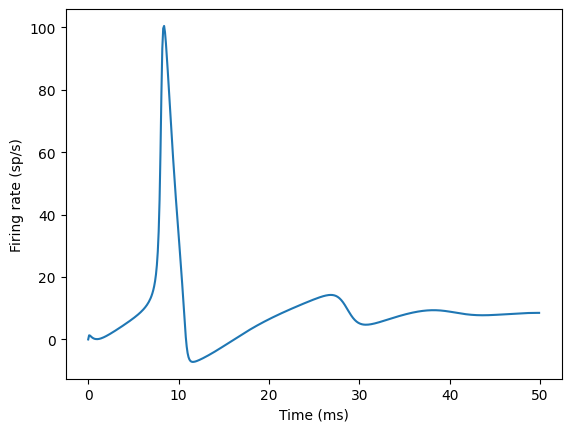

In [ ]:
M = StateMonitor(neuron, 'v', record=True)

#run(50*ms, report='text')

neuron.I[0] = 1*uA  # current injection at one end
run(50*ms)
plot(M.t/ms, M.v[0]/mV)
xlabel('Time (ms)')
ylabel('Voltage (mV)');